In [1]:
import pandas as pd
df = pd.read_csv("bayut_selling_properties.csv")

In [2]:
df.isnull().sum()

,0
price,0
price_category,0
type,0
beds,0
baths,0
address,0
furnishing,0
completion_status,0
post_date,0
average_rent,0


In [12]:
df.dropna(subset=['Latitude', 'Longitude'],inplace = True)

In [ ]:
df.columns

Index(['price', 'price_category', 'type', 'beds', 'baths', 'address',
       'furnishing', 'completion_status', 'post_date', 'average_rent',
       'building_name', 'year_of_completion', 'total_parking_spaces',
       'total_floors', 'total_building_area_sqft', 'elevators', 'area_name',
       'city', 'country', 'Latitude', 'Longitude', 'purpose'],
      dtype='object')

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [15]:
# Define the mapping dictionary to assign manually the codes for type
type_mapping = {'Residential Building': 0, 'Residential Floor': 1,'Residential Plot': 2,'Hotel Apartment': 3,'Penthouse': 4,'Apartment': 5}
df = pd.concat([df, df['type'].map(type_mapping).rename('type_encoded')], axis=1)

# Define the mapping dictionary to assign manually the codes for price category
type_mapping = {'Low': 0, 'Average': 1,'Medium': 2,'High': 3}
df = pd.concat([df, df['price_category'].map(type_mapping).rename('price_cat_encoded')], axis=1)

#Dropping Type
df = df.drop(['type'], axis=1)
#Dropping Type
df = df.drop(['price_category'], axis=1)
df = df.drop(['purpose'], axis=1)
df = df.drop(['country'], axis=1)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [7]:
fig = px.scatter(df, x='total_building_area_sqft', y='price', color='area_name',
                 title='Price vs Area by Location')
fig.show()


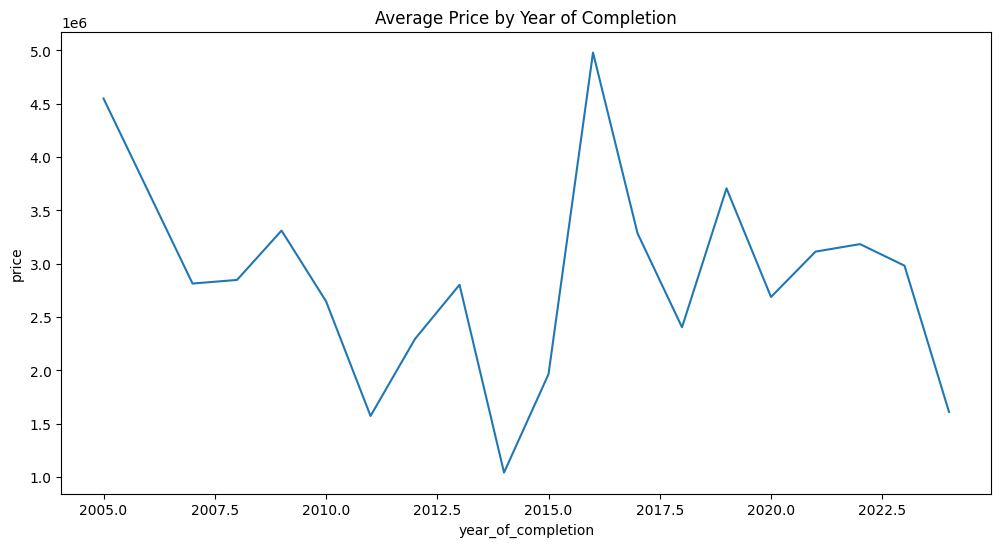

In [11]:
df['year_of_completion'] = df['year_of_completion'].replace(0, np.nan)
price_by_year = df.groupby('year_of_completion')['price'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=price_by_year, x='year_of_completion', y='price')
plt.title('Average Price by Year of Completion')
plt.show()


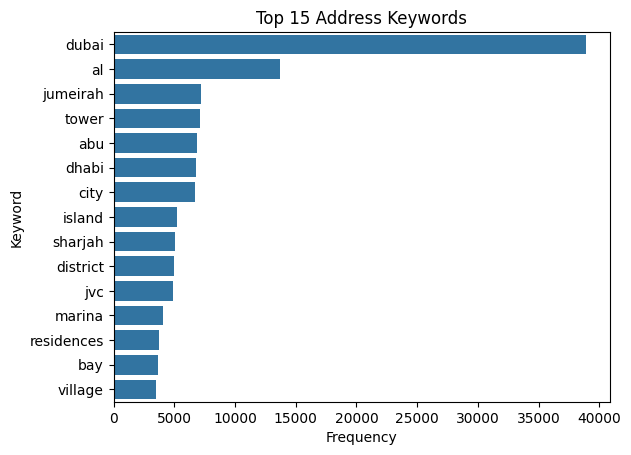

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['address'].astype(str))
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:15]

keywords_df = pd.DataFrame(words_freq, columns=['Keyword', 'Frequency'])
sns.barplot(x='Frequency', y='Keyword', data=keywords_df)
plt.title('Top 15 Address Keywords')
plt.show()


In [18]:
label_encoder = preprocessing.LabelEncoder()
df.loc[:,'furnishing']= label_encoder.fit_transform(df['furnishing'])
status_encoder = preprocessing.LabelEncoder()
df.loc[:,'completion_status']= status_encoder.fit_transform(df['completion_status'])
area_encoder = preprocessing.LabelEncoder()
df.loc[:,'area_name']= area_encoder.fit_transform(df['area_name'])
city_encoder=preprocessing.LabelEncoder()
df.loc[:,'city']=city_encoder.fit_transform(df['city'])

In [18]:
df.columns

Index(['price', 'price_category', 'type', 'beds', 'baths', 'address',
       'furnishing', 'completion_status', 'post_date', 'average_rent',
       'building_name', 'year_of_completion', 'total_parking_spaces',
       'total_floors', 'total_building_area_sqft', 'elevators', 'area_name',
       'city', 'country', 'Latitude', 'Longitude', 'purpose'],
      dtype='object')

In [ ]:
df['building_name'] = df['building_name'].replace('Unknown', np.nan)
df['total_floors'] = df['total_floors'].replace(0, np.nan)
df['total_building_area_sqft'] = df['total_building_area_sqft'].replace(0, np.nan)


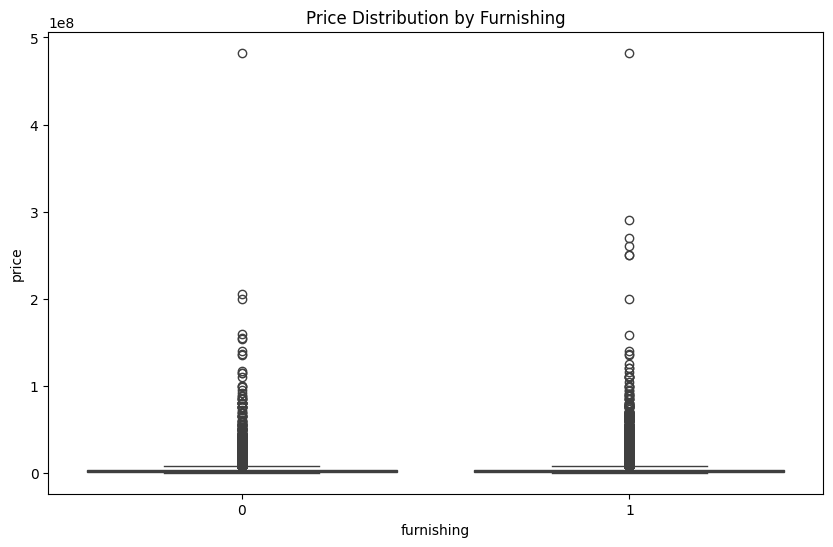

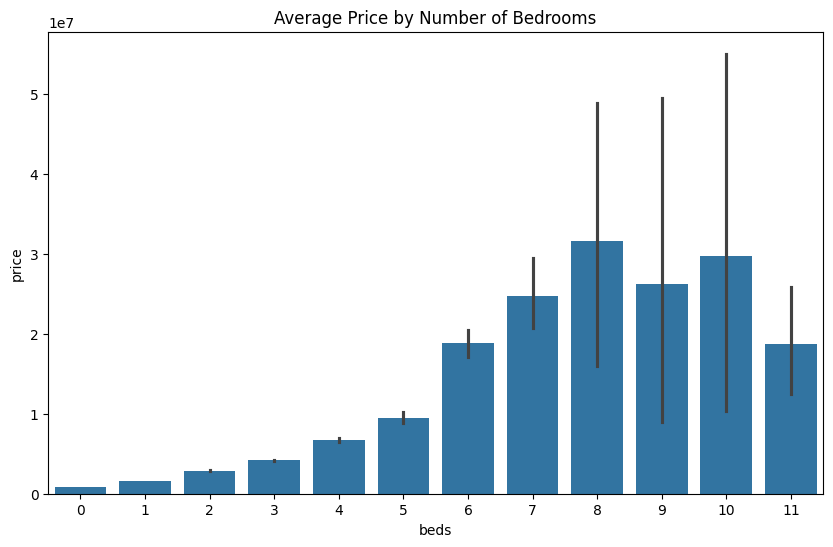

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='furnishing', y='price', data=df)
plt.title('Price Distribution by Furnishing')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='beds', y='price', data=df)
plt.title('Average Price by Number of Bedrooms')
plt.show()


average_rent has 0
building_name has unknown
year_of_completion has 0
total_building_area_sqft has 0
total_floors has 0 but can be valid

In [ ]:
df.columns

Index(['price', 'beds', 'baths', 'address', 'furnishing', 'completion_status',
       'post_date', 'average_rent', 'building_name', 'year_of_completion',
       'total_parking_spaces', 'total_floors', 'total_building_area_sqft',
       'elevators', 'area_name', 'city', 'Latitude', 'Longitude',
       'type_encoded', 'price_cat_encoded'],
      dtype='object')

In [ ]:
features=['beds', 'baths', 'furnishing', 'completion_status', 'average_rent', 'year_of_completion',
       'total_parking_spaces', 'total_floors', 'total_building_area_sqft',
       'elevators', 'area_name', 'city', 'Latitude', 'Longitude',
       'type_encoded', 'price_cat_encoded']

X=df[features].fillna(0)
y = df['price']

/tmp/ipython-input-3183253921.py:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {'R2': r2, 'RMSE': rmse, 'MAE': mae}

# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 33090, number of used features: 16
[LightGBM] [Info] Start training from score 3825851.248897

Linear Regression:
R2: 0.32
RMSE: 5835348.42
MAE: 2507801.26

Random Forest:
R2: 0.64
RMSE: 4261440.82
MAE: 838089.31

XGBoost:
R2: 0.59
RMSE: 4540899.11
MAE: 970847.94

LightGBM:
R2: 0.65
RMSE: 4162739.80
MAE: 1066844.92


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
r2 = r2_score(y_test, y_pred_dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae = mean_absolute_error(y_test, y_pred_dt)

print(f"Decision Tree:")
print(f"R2: {r2:.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")


Decision Tree:
R2: 0.31
RMSE: 5,882,342.11
MAE: 1,207,428.00


In [8]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('bayut_selling_properties.csv')
df['building_name'] = df['building_name'].replace('Unknown', np.nan)
df['year_of_completion'] = df['year_of_completion'].replace(0, np.nan)
df['total_floors'] = df['total_floors'].replace(0, np.nan)
df['total_building_area_sqft'] = df['total_building_area_sqft'].replace(0, np.nan)


In [36]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Age from year of completion
df['age'] = 2025 - df['year_of_completion']

# Missing flags
df['missing_building_area'] = df['total_building_area_sqft'].isna().astype(int)
df['missing_year'] = df['year_of_completion'].isna().astype(int)
df['missing_floors'] = df['total_floors'].isna().astype(int)


# Drop irrelevant or noisy columns
features=['beds', 'baths', 'furnishing', 'completion_status', 'average_rent', 'year_of_completion',
       'total_parking_spaces', 'total_floors', 'total_building_area_sqft',
       'elevators', 'area_name', 'city', 'Latitude', 'Longitude',
       'type_encoded', 'price_cat_encoded']
X = df[features]
y = df['price']


for col in features:
    X[col] = X[col].astype(str).fillna('nan')

/tmp/ipython-input-1115113506.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str).fillna('nan')
/tmp/ipython-input-1115113506.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str).fillna('nan')
/tmp/ipython-input-1115113506.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='MAE',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100
)

# Fit the model
model.fit(X_train, y_train,
          cat_features=features,
          eval_set=(X_valid, y_valid))


0:	learn: 3089527.1053713	test: 3103118.7002894	best: 3103118.7002894 (0)	total: 459ms	remaining: 7m 38s
100:	learn: 1490623.3376460	test: 1456148.5598921	best: 1456132.7650475 (99)	total: 11.8s	remaining: 1m 45s
200:	learn: 1397869.0992824	test: 1376885.1076082	best: 1376885.1076082 (200)	total: 22.3s	remaining: 1m 28s
300:	learn: 1335396.2134786	test: 1326916.8552299	best: 1326916.8552299 (300)	total: 34.5s	remaining: 1m 20s
400:	learn: 1290030.5500019	test: 1298289.3477478	best: 1298289.3477478 (400)	total: 46.6s	remaining: 1m 9s
500:	learn: 1252763.0815577	test: 1274350.4058186	best: 1274350.4058186 (500)	total: 58.3s	remaining: 58s
600:	learn: 1221569.7827472	test: 1257628.1986578	best: 1257353.9424600 (598)	total: 1m 10s	remaining: 46.8s
700:	learn: 1194958.9946239	test: 1243733.6367134	best: 1243360.9292907 (686)	total: 1m 22s	remaining: 35.1s
800:	learn: 1171119.2715220	test: 1232758.9422674	best: 1232677.5101975 (798)	total: 1m 34s	remaining: 23.4s
900:	learn: 1148900.7985533	

In [41]:
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    y_pred = model.predict(X_valid)

    r2 = r2_score(y_valid, y_pred)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    mae = mean_absolute_error(y_valid, y_pred)

    results= {'R2': r2, 'RMSE': rmse, 'MAE': mae}

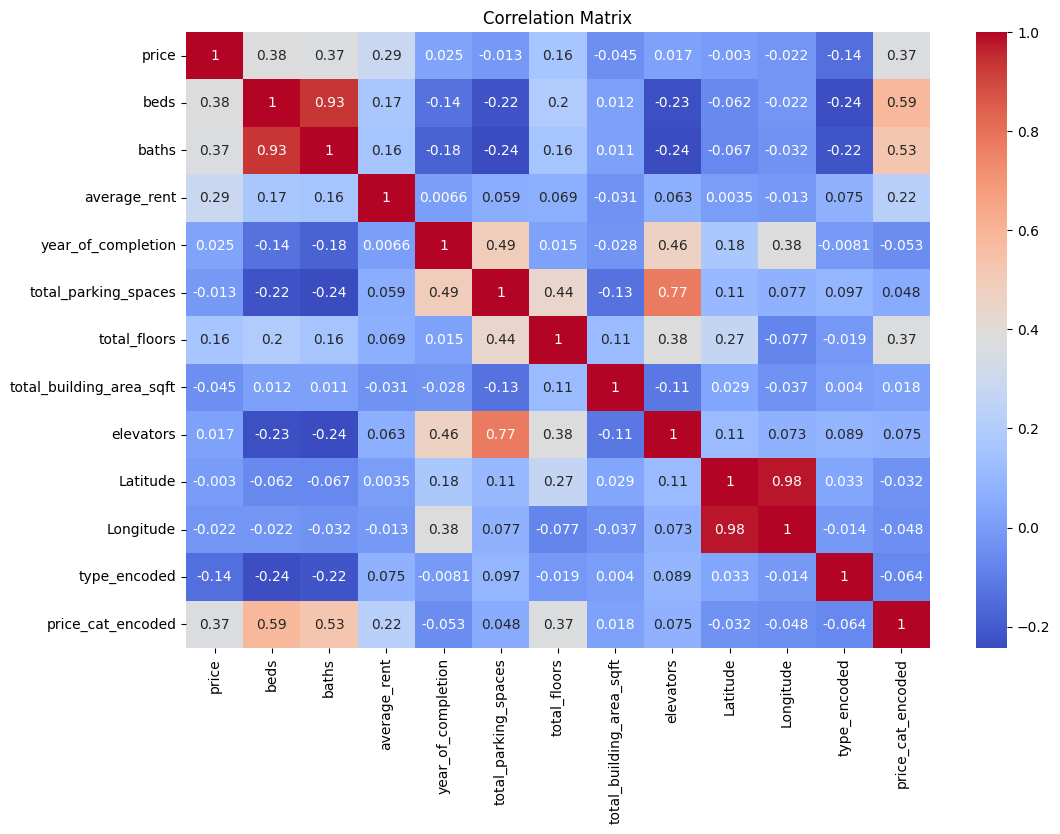

In [ ]:
# Ensure only numeric columns are included
numeric_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Customer Clustering

In [43]:
df.columns

Index(['price', 'beds', 'baths', 'address', 'furnishing', 'completion_status',
       'post_date', 'average_rent', 'building_name', 'year_of_completion',
       'total_parking_spaces', 'total_floors', 'total_building_area_sqft',
       'elevators', 'area_name', 'city', 'Latitude', 'Longitude', 'age',
       'missing_building_area', 'missing_year', 'missing_floors',
       'type_encoded', 'price_cat_encoded'],
      dtype='object')

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features
clustering_features = [
    'price', 'beds', 'baths', 'furnishing',
    'type_encoded', 'completion_status', 'Latitude', 'Longitude'
]

df_clust = df[clustering_features].copy()

# Handle missing values
df_clust = df_clust.dropna()

# Separate types
numerical = ['price', 'beds', 'baths', 'Latitude', 'Longitude']
categorical = ['furnishing', 'type_encoded', 'completion_status']

# Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])


In [47]:
# Full pipeline
cluster_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))  # You can tune n_clusters
])

# Fit the pipeline
cluster_pipeline.fit(df_clust)

# Get cluster labels
df_clust['cluster'] = cluster_pipeline.named_steps['kmeans'].labels_


In [48]:
# View cluster size
print(df_clust['cluster'].value_counts())

# Combine with original listings if needed
df_with_cluster = df.join(df_clust['cluster'], how='left')


cluster
1    14314
4    11030
3     3644
2     1449
0      121
Name: count, dtype: int64


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # or use TSNE for non-linear


features = ['price', 'beds', 'baths', 'total_building_area_sqft', 'Latitude', 'Longitude']
X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Add back cluster labels
df_vis = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_vis['cluster'] = df['cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [53]:
X = df[features].dropna()
clusters = df.loc[X.index, 'cluster']


KeyError: 'cluster'

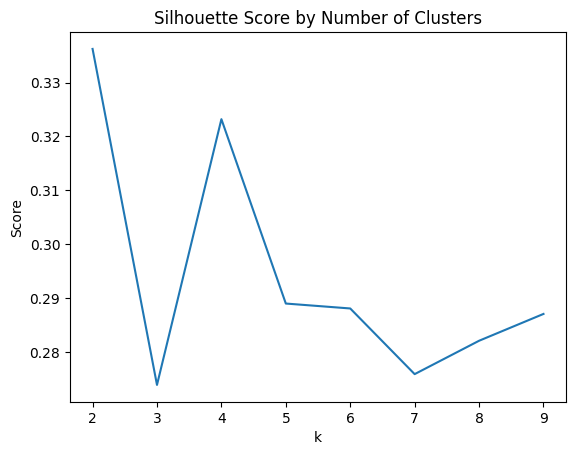

In [49]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
for k in range(2, 10):
    pipe = Pipeline([
        ('pre', preprocessor),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])
    pipe.fit(df_clust)
    score = silhouette_score(pipe.named_steps['pre'].transform(df_clust),
                             pipe.named_steps['kmeans'].labels_)
    scores.append(score)

plt.plot(range(2, 10), scores)
plt.title("Silhouette Score by Number of Clusters")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()
